# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
def circs(circuits):
    '''
    Gives copy of list of circuits
    '''
    n_circuits = [circ.copy() for circ in circuits ]
    return n_circuits

In [8]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1,p2,p3 = [ 0.00172129,-0.00182397, -0.11217598]


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.09248706054687483
Mitigated diff is 0.062258201992235085
1
Noisy diff is 0.0879833984374998
Mitigated diff is 0.05346406068779741
2
Noisy diff is 0.10047485351562502
Mitigated diff is 0.057406669719169745
3
Noisy diff is 0.09928833007812499
Mitigated diff is 0.06087147714827057
4
Noisy diff is 0.10348754882812505
Mitigated diff is 0.05813892978766044
5
Noisy diff is 0.09194531249999982
Mitigated diff is 0.05109019000584647
6
Noisy diff is 0.1007663574218749
Mitigated diff is 0.06431075577637513
7
Noisy diff is 0.09989501953125002
Mitigated diff is 0.06145266036064956
8
Noisy diff is 0.09896582031249967
Mitigated diff is 0.06353812558426819
9
Noisy diff is 0.08962329101562494
Mitigated diff is 0.05210633691155797
10
Noisy diff is 0.09803198242187494
Mitigated diff is 0.0542167673634959
11
Noisy diff is 0.09406005859374988
Mitigated diff is 0.06396276007282053
12
Noisy diff is 0.097409912109375
Mitigated diff is 0.050537428227604986
13
Noisy diff is 0.09541723632812482


Noisy diff is 0.09052221679687489
Mitigated diff is 0.05952702287946421
111
Noisy diff is 0.08855541992187499
Mitigated diff is 0.05142877908224608
112
Noisy diff is 0.09179028320312499
Mitigated diff is 0.06365767621050811
113
Noisy diff is 0.09609326171874999
Mitigated diff is 0.048714262343559245
114
Noisy diff is 0.09659594726562482
Mitigated diff is 0.057110517363495594
115
Noisy diff is 0.10055981445312523
Mitigated diff is 0.05455087825043892
116
Noisy diff is 0.09744628906250008
Mitigated diff is 0.05506071218941755
117
Noisy diff is 0.08979931640625027
Mitigated diff is 0.05303575285933704
118
Noisy diff is 0.09106933593749977
Mitigated diff is 0.047055739540407426
119
Noisy diff is 0.09899462890624999
Mitigated diff is 0.04520793668679435
120
Noisy diff is 0.0896120605468751
Mitigated diff is 0.0603306457594055
121
Noisy diff is 0.0931696777343749
Mitigated diff is 0.051726628297821264
122
Noisy diff is 0.09690234374999984
Mitigated diff is 0.06708628555689078
123
Noisy diff 

Noisy diff is 0.09764770507812504
Mitigated diff is 0.0611631694043806
219
Noisy diff is 0.09176025390624964
Mitigated diff is 0.058878677610366914
220
Noisy diff is 0.09131738281249979
Mitigated diff is 0.05546880253092934
221
Noisy diff is 0.08881005859374991
Mitigated diff is 0.05629515188414902
222
Noisy diff is 0.10205126953124988
Mitigated diff is 0.06794946414262815
223
Noisy diff is 0.09485180664062487
Mitigated diff is 0.053844078680650886
224
Noisy diff is 0.09326269531249975
Mitigated diff is 0.06379144190228159
225
Noisy diff is 0.09938720703125004
Mitigated diff is 0.05976153571905507
226
Noisy diff is 0.08637329101562496
Mitigated diff is 0.06309710410878933
227
Noisy diff is 0.09432910156249985
Mitigated diff is 0.05522126068376054
228
Noisy diff is 0.11155737304687485
Mitigated diff is 0.0683041417388226
229
Noisy diff is 0.08958911132812508
Mitigated diff is 0.05129937448244237
230
Noisy diff is 0.09090942382812495
Mitigated diff is 0.05827528240293778
231
Noisy diff i

Noisy diff is 0.09313256835937489
Mitigated diff is 0.06018744928767794
327
Noisy diff is 0.09847949218749985
Mitigated diff is 0.06155448721465118
328
Noisy diff is 0.08855859375000019
Mitigated diff is 0.05242182962424846
329
Noisy diff is 0.09389624023437526
Mitigated diff is 0.06246835622672209
330
Noisy diff is 0.09665820312499984
Mitigated diff is 0.06383047762242033
331
Noisy diff is 0.09886035156249995
Mitigated diff is 0.06207177919217077
332
Noisy diff is 0.09871826171874998
Mitigated diff is 0.0644109046517718
333
Noisy diff is 0.09866381835937499
Mitigated diff is 0.0692449257502481
334
Noisy diff is 0.09177758789062485
Mitigated diff is 0.05315919155316973
335
Noisy diff is 0.09943945312499991
Mitigated diff is 0.058664933076430614
336
Noisy diff is 0.09798974609375
Mitigated diff is 0.06564565978184134
337
Noisy diff is 0.08887377929687501
Mitigated diff is 0.051958846475789855
338
Noisy diff is 0.09605493164062495
Mitigated diff is 0.061643361932351315
339
Noisy diff is 

Noisy diff is 0.10141796874999998
Mitigated diff is 0.051371271556165166
435
Noisy diff is 0.09019458007812498
Mitigated diff is 0.056518835468597484
436
Noisy diff is 0.10176953124999988
Mitigated diff is 0.06312738109406468
437
Noisy diff is 0.0927707519531249
Mitigated diff is 0.05802472495497035
438
Noisy diff is 0.100672607421875
Mitigated diff is 0.05999915501707487
439
Noisy diff is 0.09767919921875001
Mitigated diff is 0.0540673793545865
440
Noisy diff is 0.08514111328124985
Mitigated diff is 0.054000079124339795
441
Noisy diff is 0.09422290039062498
Mitigated diff is 0.06295803285256407
442
Noisy diff is 0.09138256835937497
Mitigated diff is 0.05844297894488326
443
Noisy diff is 0.09600073242187523
Mitigated diff is 0.06290660419766891
444
Noisy diff is 0.09583691406249994
Mitigated diff is 0.052958282955109404
445
Noisy diff is 0.10123510742187503
Mitigated diff is 0.059621511859451415
446
Noisy diff is 0.09557226562500021
Mitigated diff is 0.056947903032078306
447
Noisy diff

Noisy diff is 0.09695849609375018
Mitigated diff is 0.062381869622348374
543
Noisy diff is 0.08573510742187485
Mitigated diff is 0.05793057868780527
544
Noisy diff is 0.09621801757812487
Mitigated diff is 0.06614672523656884
545
Noisy diff is 0.09770312499999989
Mitigated diff is 0.0590105072889795
546
Noisy diff is 0.0968552246093749
Mitigated diff is 0.04903427264518334
547
Noisy diff is 0.09773046874999991
Mitigated diff is 0.060427580617082643
548
Noisy diff is 0.09798071289062493
Mitigated diff is 0.060178977793040156
549
Noisy diff is 0.09748144531249969
Mitigated diff is 0.055561630288153196
550
Noisy diff is 0.08922778320312519
Mitigated diff is 0.04470598969463624
551
Noisy diff is 0.09981249999999986
Mitigated diff is 0.05986386211986794
552
Noisy diff is 0.09107128906249984
Mitigated diff is 0.05360927518527148
553
Noisy diff is 0.10379809570312482
Mitigated diff is 0.06120455031139316
554
Noisy diff is 0.09143847656250004
Mitigated diff is 0.061630864800347185
555
Noisy dif

Noisy diff is 0.09946923828124998
Mitigated diff is 0.05869146950597148
651
Noisy diff is 0.09803149414062506
Mitigated diff is 0.05764896900517025
652
Noisy diff is 0.09118115234375002
Mitigated diff is 0.0536203125000001
653
Noisy diff is 0.0930041503906247
Mitigated diff is 0.0574755348376057
654
Noisy diff is 0.10156127929687497
Mitigated diff is 0.06266592910697666
655
Noisy diff is 0.09953100585937502
Mitigated diff is 0.058901747932392334
656
Noisy diff is 0.09943408203125004
Mitigated diff is 0.0628053433112028
657
Noisy diff is 0.08988037109375013
Mitigated diff is 0.05175124103327233
658
Noisy diff is 0.09914550781249976
Mitigated diff is 0.06611901298029221
659
Noisy diff is 0.09419311523437468
Mitigated diff is 0.05834718072725864
660
Noisy diff is 0.09645263671874993
Mitigated diff is 0.05546978212759468
661
Noisy diff is 0.09551269531250006
Mitigated diff is 0.05569326362656457
662
Noisy diff is 0.09016284179687506
Mitigated diff is 0.05225434129130413
663
Noisy diff is 0

Noisy diff is 0.09825292968749977
Mitigated diff is 0.05218219953381609
759
Noisy diff is 0.09135424804687498
Mitigated diff is 0.06332878807627829
760
Noisy diff is 0.097503662109375
Mitigated diff is 0.051621717605311535
761
Noisy diff is 0.09221240234375006
Mitigated diff is 0.0561631986774076
762
Noisy diff is 0.097616455078125
Mitigated diff is 0.06267689440008772
763
Noisy diff is 0.09915747070312486
Mitigated diff is 0.06446777194702014
764
Noisy diff is 0.09479907226562512
Mitigated diff is 0.058787121747494675
765
Noisy diff is 0.09122827148437507
Mitigated diff is 0.05279022811498413
766
Noisy diff is 0.10025170898437485
Mitigated diff is 0.06277950285933653
767
Noisy diff is 0.09423486328124997
Mitigated diff is 0.061065743948866213
768
Noisy diff is 0.10007885742187506
Mitigated diff is 0.048586527908940136
769
Noisy diff is 0.09537890625
Mitigated diff is 0.056475581614580106
770
Noisy diff is 0.09593432617187503
Mitigated diff is 0.05646913444173385
771
Noisy diff is 0.09

Noisy diff is 0.09904736328124986
Mitigated diff is 0.06853647115146133
867
Noisy diff is 0.09473242187499986
Mitigated diff is 0.05417118830605161
868
Noisy diff is 0.0997810058593751
Mitigated diff is 0.05640825451675102
869
Noisy diff is 0.10214624023437491
Mitigated diff is 0.05856878129197707
870
Noisy diff is 0.10079907226562468
Mitigated diff is 0.055064164985404895
871
Noisy diff is 0.09971411132812513
Mitigated diff is 0.05827647825807025
872
Noisy diff is 0.10175659179687502
Mitigated diff is 0.06494992869543648
873
Noisy diff is 0.09568701171874994
Mitigated diff is 0.04858730647607601
874
Noisy diff is 0.10204663085937493
Mitigated diff is 0.05437144687452289
875
Noisy diff is 0.09090356445312509
Mitigated diff is 0.061449485784397906
876
Noisy diff is 0.09560229492187489
Mitigated diff is 0.05732811295692142
877
Noisy diff is 0.10058129882812494
Mitigated diff is 0.06226307496756722
878
Noisy diff is 0.09331225585937508
Mitigated diff is 0.04936822821275966
879
Noisy diff 

Noisy diff is 0.09813183593750008
Mitigated diff is 0.06246099992130261
975
Noisy diff is 0.09902490234374994
Mitigated diff is 0.053308169164088204
976
Noisy diff is 0.09913208007812513
Mitigated diff is 0.053826663554544574
977
Noisy diff is 0.09722290039062487
Mitigated diff is 0.05968283151852494
978
Noisy diff is 0.09777709960937508
Mitigated diff is 0.05257084454174299
979
Noisy diff is 0.10403027343750004
Mitigated diff is 0.05045521346058446
980
Noisy diff is 0.09592602539062511
Mitigated diff is 0.05397753614151579
981
Noisy diff is 0.08601000976562467
Mitigated diff is 0.06439719700330038
982
Noisy diff is 0.09099780273437497
Mitigated diff is 0.05340737127596862
983
Noisy diff is 0.10104638671874988
Mitigated diff is 0.05578893197763368
984
Noisy diff is 0.09677856445312494
Mitigated diff is 0.05448331913428062
985
Noisy diff is 0.09738012695312492
Mitigated diff is 0.054566347994928543
986
Noisy diff is 0.1042355957031249
Mitigated diff is 0.05721847414196035
987
Noisy diff

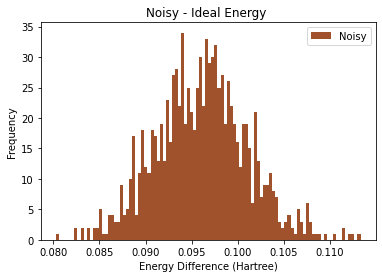

In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "sienna", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_optimized.png', dpi = 1000)


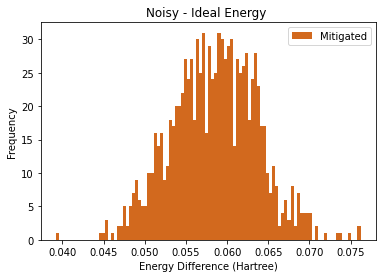

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
#plt.hist(diff_r, bins=100, color = "orang", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "chocolate", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_mitigated_optimized.png', dpi = 1000)

# Without Readout

In [11]:
energies

[[[0.00172129, -0.00182397, -0.11217598],
  -1.0925585027157934,
  -1.0000714421689185,
  -1.0303003007235583],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0897745671689183,
  -1.0017911687314185,
  -1.0363105064811209],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0935831609189184,
  -0.9931083074032934,
  -1.0361764911997486],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0963868718564185,
  -0.9970985417782935,
  -1.035515394708148],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0979781804501685,
  -0.9944906316220434,
  -1.039839250662508],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0941493230282933,
  -1.0022040105282934,
  -1.0430591330224468],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0963026433407934,
  -0.9955362859189185,
  -1.0319918875644183],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0986170964657935,
  -0.9987220769345435,
  -1.037164436105144],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0962713933407933,
  -0.9973055730282936,
  -1.03273326775652

In [12]:
diff_r

[0.09248706054687483,
 0.0879833984374998,
 0.10047485351562502,
 0.09928833007812499,
 0.10348754882812505,
 0.09194531249999982,
 0.1007663574218749,
 0.09989501953125002,
 0.09896582031249967,
 0.08962329101562494,
 0.09803198242187494,
 0.09406005859374988,
 0.097409912109375,
 0.09541723632812482,
 0.09300415039062493,
 0.11251147460937494,
 0.10071142578124992,
 0.08914843750000001,
 0.10020874023437498,
 0.09739624023437488,
 0.0986770019531249,
 0.0973564453125001,
 0.099428466796875,
 0.10127685546874998,
 0.09208447265624975,
 0.10436401367187509,
 0.09025244140624977,
 0.10395019531249994,
 0.10037475585937461,
 0.09596582031250023,
 0.09606152343749996,
 0.09201416015624986,
 0.10279174804687496,
 0.09327954101562486,
 0.09553247070312487,
 0.09830932617187482,
 0.10658251953125009,
 0.098696044921875,
 0.09736279296874994,
 0.09509545898437488,
 0.09798852539062475,
 0.0885651855468752,
 0.08881665039062492,
 0.093874267578125,
 0.09040429687500007,
 0.09309863281249986,
 

In [13]:
diff_nr 

[0.062258201992235085,
 0.05346406068779741,
 0.057406669719169745,
 0.06087147714827057,
 0.05813892978766044,
 0.05109019000584647,
 0.06431075577637513,
 0.06145266036064956,
 0.06353812558426819,
 0.05210633691155797,
 0.0542167673634959,
 0.06396276007282053,
 0.050537428227604986,
 0.05844905259128863,
 0.06002940442803717,
 0.061041375351557736,
 0.05514227150345308,
 0.050827528986855386,
 0.06435887452513489,
 0.05882725104214348,
 0.058676928740746925,
 0.052368359553857546,
 0.05787341938989843,
 0.06985166729353987,
 0.05298597523895365,
 0.07373477768743708,
 0.05430284544556985,
 0.05035523048258339,
 0.06102983580894494,
 0.060554664394739,
 0.06288727004874461,
 0.05735252812371239,
 0.054830277307258646,
 0.06402154459774545,
 0.04765352026990288,
 0.058953762347451644,
 0.06795858629760021,
 0.06239358038337528,
 0.06348025692298132,
 0.05286543949009337,
 0.05108777960049271,
 0.05638222221029854,
 0.05166166598152677,
 0.06593102050960153,
 0.05177233935910608,
 0.0